# Convolution Neural Networks

#### Cats and Dogs

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Part 1 - Data Preprocessing

### Image Data Generator Class

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Training Set

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
        '../../../Deep_Learning/CNN/dataset/training_set',
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


### Test Set

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
        '../../../Deep_Learning/CNN/dataset/test_set',
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Model Building

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [7]:
tf.random.set_seed(42)

cnn = Sequential()

cnn.add(Conv2D(32, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy', optimizer='adam',
            metrics=['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

## Part 3 - Model Training

In [9]:
epochs = 100

cnn.fit_generator(training_set, validation_data=test_set, 
                  epochs=epochs)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 63 steps
Epoch 1/100
250/250 [==============================] - 34s 137ms/step - loss: 0.6904 - accuracy: 0.5250 - val_loss: 0.6699 - val_accuracy: 0.5890
Epoch 2/100
250/250 [==============================] - 34s 135ms/step - loss: 0.6292 - accuracy: 0.6503 - val_loss: 0.5709 - val_accuracy: 0.7130
Epoch 3/100
250/250 [==============================] - 34s 135ms/step - loss: 0.5734 - accuracy: 0.7013 - val_loss: 0.5606 - val_accuracy: 0.7270
Epoch 4/100
250/250 [==============================] - 34s 135ms/step - loss: 0.5311 - accuracy: 0.7352 - val_loss: 0.5268 - val_accuracy: 0.7425
Epoch 5/100
250/250 [==============================] - 34s 135ms/step - loss: 0.5104 - accuracy: 0.7440 - val_loss: 0.4942 - val_accuracy: 0.7680
Epoch 6/100
250/250 [==============================] - 34s 135ms/step - loss: 0.4814 - accuracy: 0.77

## Part 4 - Model Evaluation

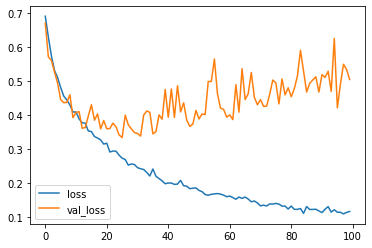

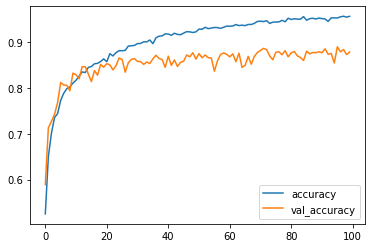

In [10]:
metrics = pd.DataFrame(cnn.history.history)
metrics[['loss', 'val_loss']].plot()
metrics[['accuracy', 'val_accuracy']].plot()

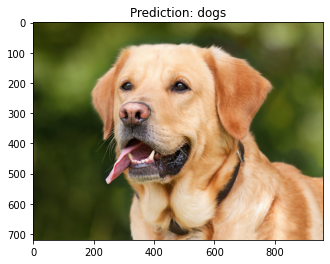

In [11]:
from tensorflow.keras.preprocessing import image
from matplotlib.image import imread
import matplotlib.pyplot as plt

PATH = '../../../Deep_Learning/CNN/dataset/single_prediction/cat_or_dog_1.jpg'

test_image = image.load_img(PATH, target_size=(128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image / 255, axis=0)
result = cnn.predict_classes(test_image)
label = list(training_set.class_indices.keys())[result[0][0]]

plt.title("Prediction: " + label)
plt.imshow(imread(PATH))

In [12]:
cnn.save("cat_dog.h5")

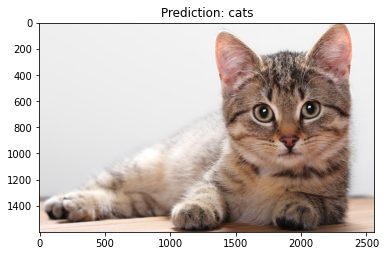

In [13]:
from tensorflow.keras.preprocessing import image
from matplotlib.image import imread
import matplotlib.pyplot as plt

PATH = '../../../Deep_Learning/CNN/dataset/single_prediction/cat_or_dog_2.jpg'

test_image = image.load_img(PATH, target_size=(128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image / 255, axis=0)
result = cnn.predict_classes(test_image)
label = list(training_set.class_indices.keys())[result[0][0]]

plt.title("Prediction: " + label)
plt.imshow(imread(PATH))